In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from pathlib import Path

In [2]:

data = pd.read_csv(r"House_data.csv")

In [3]:
print("Dataset Preview:")
data.head()

Dataset Preview:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
x = data[["sqft_living"]].values 
y = data["price"].values

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=1/3, random_state=0)

In [6]:
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [7]:
ypred = regressor.predict(xtest)

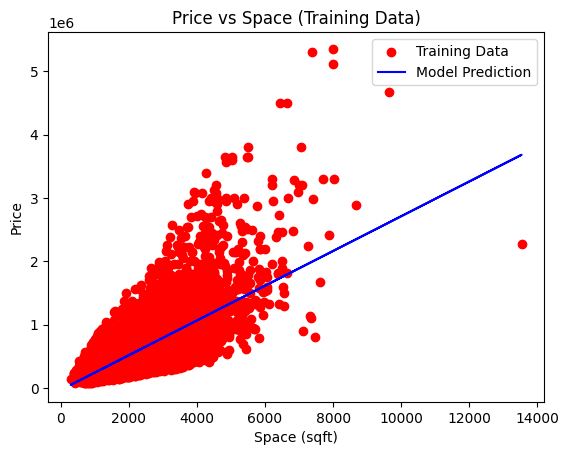

In [8]:
plt.scatter(xtrain, ytrain, color="red", label="Training Data")
plt.plot(xtrain, regressor.predict(xtrain), color="blue", label="Model Prediction")
plt.title("Price vs Space (Training Data)")
plt.xlabel("Space (sqft)")
plt.ylabel("Price")
plt.legend()
plt.show()

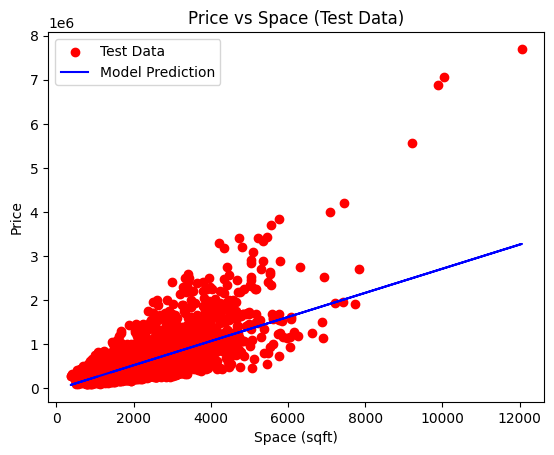

In [9]:
plt.scatter(xtest, ytest, color="red", label="Test Data")
plt.plot(xtest, ypred, color="blue", label="Model Prediction")
plt.title("Price vs Space (Test Data)")
plt.xlabel("Space (sqft)")
plt.ylabel("Price")
plt.legend()
plt.show()

In [10]:
bias = regressor.score(xtrain, ytrain)
variance = regressor.score(xtest, ytest)

In [11]:
print(f"\nThe R² of Train data: {bias:.2f}")
print(f"The R² of Test data: {variance:.2f}")


The R² of Train data: 0.49
The R² of Test data: 0.50


In [12]:
MSE_train = mean_squared_error(ytrain, regressor.predict(xtrain))
MSE_test = mean_squared_error(ytest, ypred)

In [13]:
print(f"The MSE of Train data: {MSE_train:.2f}")
print(f"The MSE of Test data: {MSE_test:.2f}")

The MSE of Train data: 66588732393.21
The MSE of Test data: 72251932678.75


In [14]:
output_file = "home_pred_linear.pkl"  # <-- Improved naming convention
with open(output_file, "wb") as file:
    pickle.dump(regressor, file)
print("\nModel saved successfully as:", output_file)


Model saved successfully as: home_pred_linear.pkl
